In [332]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()

X = iris.data
Y = iris.target

X = StandardScaler().fit_transform(X)

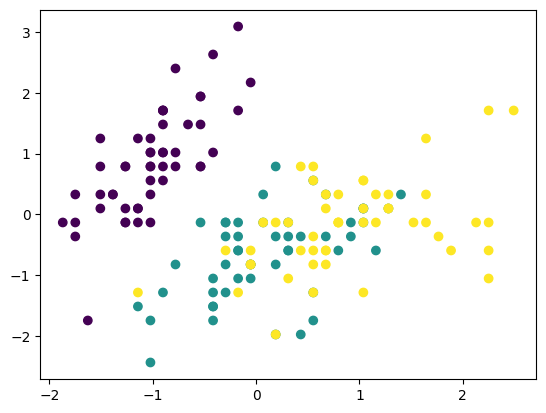

In [333]:
plt.scatter(X[:, 0], X[:, 1], c=Y)

Text(0.5, 1.0, 't-SNE')

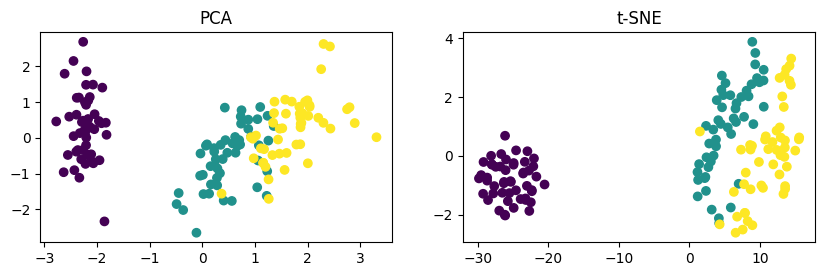

In [334]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
# couldn't install umap

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y)
plt.title('PCA')
plt.subplot(2, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=Y)
plt.title('t-SNE')

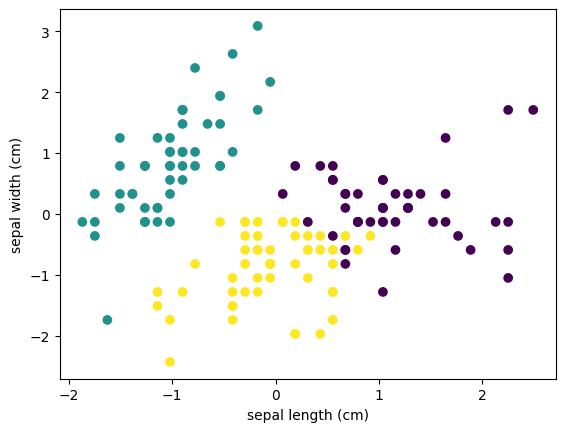

In [335]:
kmeans = KMeans(n_clusters=3, max_iter=250, n_init=10)

kmeans.fit(X)
labels = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

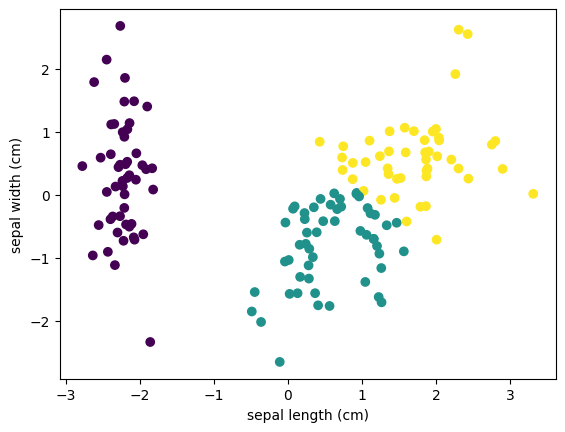

In [336]:
kmeans = KMeans(n_clusters=3, max_iter=250, n_init=10)

kmeans.fit(X_pca)
labels = kmeans.predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

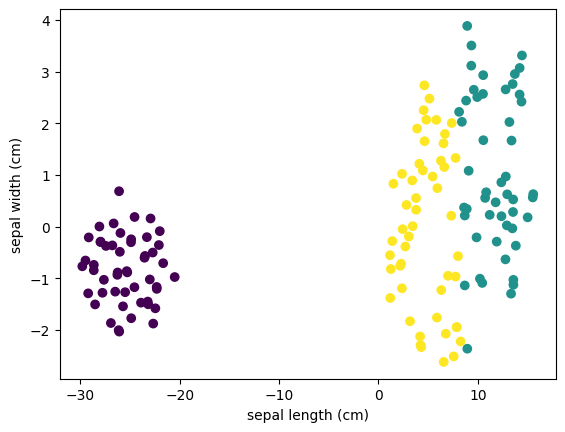

In [337]:
kmeans = KMeans(n_clusters=3, max_iter=250, n_init=10)

kmeans.fit(X_tsne)
labels = kmeans.predict(X_tsne)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

In [338]:
from sklearn.metrics import rand_score
from sklearn.metrics import davies_bouldin_score

print(rand_score(Y, labels))
print(davies_bouldin_score(X_tsne, labels))

0.8367785234899329
0.5224220033576694


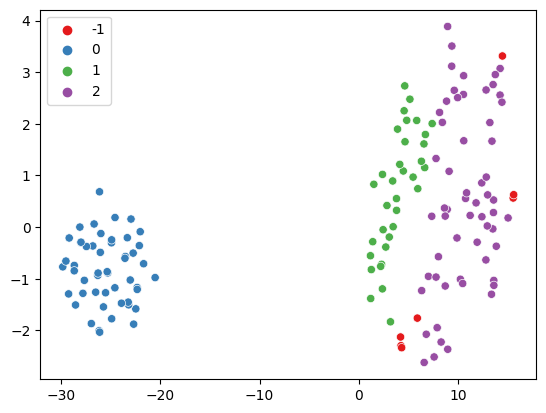

In [339]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.59, min_samples=11)
labels = dbscan.fit_predict(X_tsne)

sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=labels, palette='Set1')
plt.show()

In [340]:
print(rand_score(Y, labels))
print(davies_bouldin_score(X_tsne, labels))

0.8651454138702461
2.637827980297102


Text(0, 0.5, 'Davies–Bouldin score')

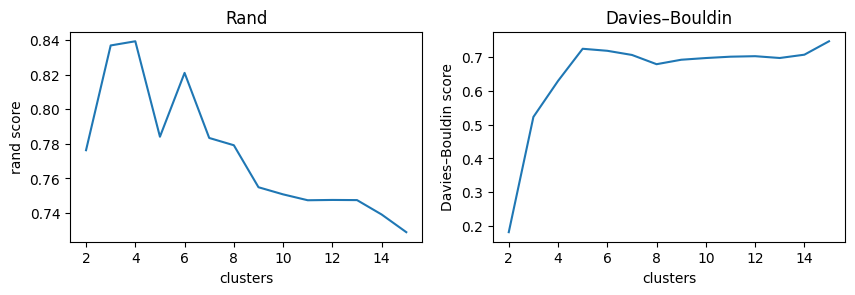

In [341]:
clusters = list(range(2, 16))

rands = []
dbs = []

for n in clusters:
    kmeans = KMeans(n_clusters=n, max_iter=250, n_init=10)

    kmeans.fit(X_tsne)
    labels = kmeans.predict(X_tsne)

    rands.append(rand_score(Y, labels))
    dbs.append(davies_bouldin_score(X_tsne, labels))

plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.plot(clusters, rands)
plt.title('Rand')
plt.xlabel('clusters')
plt.ylabel('rand score')

plt.subplot(2, 2, 2)
plt.plot(clusters, dbs)
plt.title('Davies–Bouldin')
plt.xlabel('clusters')
plt.ylabel('Davies–Bouldin score')

Text(0, 0.5, 'Davies–Bouldin score')

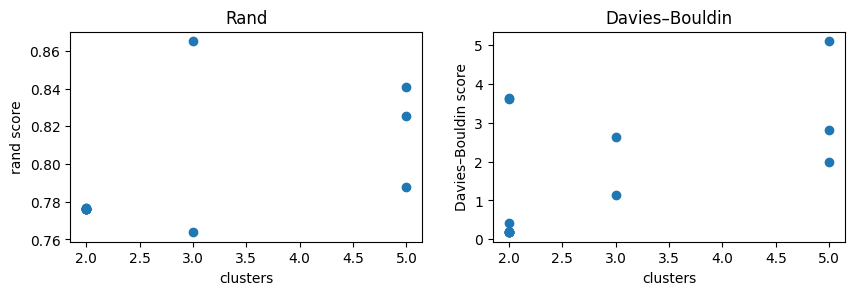

In [344]:
samples = list(range(2, 16))

clusters = []
rands = []
dbs = []

for n in samples:
    dbscan = DBSCAN(eps=1.59, min_samples=n)
    labels = dbscan.fit_predict(X_tsne)

    k = len(np.unique(labels))
    if -1 in labels:
        k = k - 1

    clusters.append(k)
    rands.append(rand_score(Y, labels))
    dbs.append(davies_bouldin_score(X_tsne, labels))

plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.scatter(clusters, rands)
plt.title('Rand')
plt.xlabel('clusters')
plt.ylabel('rand score')

plt.subplot(2, 2, 2)
plt.scatter(clusters, dbs)
plt.title('Davies–Bouldin')
plt.xlabel('clusters')
plt.ylabel('Davies–Bouldin score')